In [2]:
%display latex
Parallelism().set(nproc=8)

This notebook was written under the supervision of Éric Gourgoulhon \(LUTH\) as part of my physics internship in July 2023.

**Author** : Nicolas Seroux



# Structure conforme de la solution de Reissner\-Nordström



## Définition de la variété d'espace\-temps et de la métrique de Reissner\-Nordstrom



### Espace\-temps et atlas



In [3]:
M = Manifold(4, 'M', latex_name = r'\mathscr{M}', structure = 'Lorentzian')

On choisit de paramétrer la famille de solutions de Reissner\-Nordström par les valeurs $r_-$ et $r_+$ des rayons des horizons. Afin de simplifier les expressions symboliques et la génération d'images, on pose arbitrairement $r_-=\frac{1}{2}$ et $r_+=1$. 


In [4]:
rp = 1
rm =1/2

m = (rp+rm)/2
Q = sqrt(rp*rm)

On munit $\mathscr{M}$ de coordonnées de type Eddington\-Finkelstein entrantes $(v,r,\theta,\varphi)$ et sortantes $(u,r,\theta,\varphi)$ sur deux domaines non\-disjoints $\mathcal{R}_\mathrm{IEF}$ \(_ingoing Eddington\-Finkelstein_\) et $\mathcal{R}_\mathrm{OEF}$ \(_outgoing Eddington\-Finkelstein_\) :


In [5]:
regIEF = M.open_subset('R_{IEF}', r'\mathcal{R}_{\mathrm{IEF}}')

regOEF = M.open_subset('R_{OEF}', r'\mathcal{R}_{\mathrm{OEF}}')

M.declare_union(regIEF, regOEF)

In [6]:
X_IEF.<v,r,th,ph> = regIEF.chart(r'v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
F_IEF=X_IEF.frame()

In [7]:
X_OEF.<u,r,th,ph> = regOEF.chart(r'u r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
F_OEF=X_OEF.frame()

On définit par ailleurs les régions $\mathcal{R}_\mathrm{Cauchy}$ et $\mathcal{R}_\mathrm{BH}$ qui correspondent respectivement au développement de Cauchy des régions asymptotiquement plates $\mathrm{I}a$ et $\mathrm{I}b$, i.e. la région $r\geq r_-$, et à la région de trou noir, i.e. $r\leq r_+$. Ces régions sont définies sur un diagramme conforme d'après le schéma suivant :

Aux frontières près, on a alors :

$$
\mathcal{R}_{\mathrm{IEF}}=\mathcal{R}_{\mathrm{Ia}}\cup\mathcal{R}_{\mathrm{II}a}\cup\mathcal{R}_{\mathrm{III}a},\qquad\mathcal{R}_{\mathrm{OEF}}=\mathcal{R}_{\mathrm{Ib}}\cup\mathcal{R}_{\mathrm{II}a}\cup\mathcal{R}_{\mathrm{III}c},\qquad\mathcal{R}_{\mathrm{Cauchy}}=\mathcal{R}_{\mathrm{Ib}}\cup\mathcal{R}_{\mathrm{II}a}\cup\mathcal{R}_{\mathrm{I}a},\qquad\mathcal{R}_{\mathrm{BH}}=\mathcal{R}_{\mathrm{IIIa}}\cup\mathcal{R}_{\mathrm{II}a}\cup\mathcal{R}_{\mathrm{III}c}.
$$



In [8]:
regIIa = regIEF.intersection(regOEF, name='R_{IIa}', latex_name=r'\mathcal{R}_{\mathrm{IIa}}')


#Parties de regIEF :
regCauchyIEF = regIEF.open_subset('R_{CauchyIEF}', coord_def={X_IEF : r>rm})
X_CauchyIEF = X_IEF.restrict(regCauchyIEF)

regBHIEF = regIEF.open_subset('R_{BHIEF}', coord_def={X_IEF : r<rp})
X_BHIEF = X_IEF.restrict(regBHIEF)

regIa = regCauchyIEF.open_subset('R_{Ia}', r'\mathcal{R}_{\mathrm{Ia}}', coord_def={X_CauchyIEF:r>rp})
regIIIa = regBHIEF.open_subset('R_{IIIa}', r'\mathcal{R}_{\mathrm{IIIa}}',coord_def={X_BHIEF:r<rm})


#Parties de regOEF
regCauchyOEF = regOEF.open_subset('R_{CauchyOEF}', coord_def={X_OEF:r>rm})
X_CauchyOEF = X_OEF.restrict(regCauchyOEF)

regBHOEF = regOEF.open_subset('R_{BHOEF}', coord_def={X_OEF : r<rp})
X_BHOEF = X_OEF.restrict(regBHOEF)

regIb = regCauchyOEF.open_subset('R_{Ib}', r'\mathcal{R}_{\mathrm{Ib}}', coord_def={X_CauchyOEF: r>rp})
regIIIc = regBHOEF.open_subset('R_{IIIc}', r'\mathcal{R}_{\mathrm{IIIc}}', coord_def={X_BHOEF: r<rm})

regCauchy = regCauchyIEF.union(regCauchyOEF, name='R_{Cauchy}', latex_name=r'\mathcal{R}_\mathrm{Cauchy}')
regBH = regBHIEF.union(regBHOEF, name='R_{BH}', latex_name=r'\mathcal{R}_\mathrm{BH}')

On introduit une coordonnée de type Regge\-Wheeler $r_*$ définie par :


$$
r_*=r+\frac{r_+^2}{r_+-r_-}\log|r-r_+|-\frac{r_-^2}{r_+-r_-}\log|r-r_-|
$$



In [9]:
rstar(r) = r+(rp^2/(rp-rm))*log(abs(r-rp))-(rm^2/(rp-rm))*log(abs(r-rm))

Cette fonction permet d'exprimer le changement de carte entre les coordonnées de $\mathcal{R}_\mathrm{IEF}$ et celles de $\mathcal{R}_{\mathrm{OEF}}$.


In [10]:
trans_IEF_to_OEF = X_IEF.transition_map(X_OEF, [v-2*rstar(r), r, th, ph], restrictions1 = (rm<r, r<rp),restrictions2=(rm<r,r<rp))
trans_OEF_to_IEF=trans_IEF_to_OEF.inverse()

### Métrique de Reissner\-Nordström



En terme de $r_\pm$, la métrique de Reissner\-Nordström s'écrit dans les coordonnées d'Eddington\-Finkelstein entrantes :

$$
g=-\left(1-\frac{r_++r_-}{r}+\frac{r_+r_-}{r^2}\right)\mathrm{d}v^2+2\,\mathrm{d}v\mathrm{d}r+r^2\mathrm{d}\theta^2+r^2\sin^2\theta\,\mathrm{d}\varphi^2
$$



In [11]:
g=M.metric()

g[0,1]=1
g[0,0]=-1+2*m/r-Q^2/r^2
g[2,2]=r^2
g[3,3]=r^2*sin(th)^2

g[F_OEF,0,0,X_OEF]=-1+2*m/r-Q^2/r^2
g[F_OEF,0,1,X_OEF]=-1
g[F_OEF,2,2,X_OEF]=r^2
g[F_OEF,3,3,X_OEF]=r^2*sin(th)^2

g.display()

g = (3/2/r - 1/2/r^2 - 1) dv⊗dv + dv⊗dr + dr⊗dv + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

## Diagrammes conformes



On introduit un petit paramètre $\varepsilon$ lié à la précision numérique de nos dessins, ainsi que des coefficients $\alpha_\pm$ définis par


$$
\alpha_\pm=\frac{r_+-r_m}{2r_\pm^2},
$$

et qui interviennent dans l'expression des projections nécessaires à la réalisation du diagramme conforme.


In [12]:
alphp = (rp-rm)/(2*rp^2)
alphm = (rp-rm)/(2*rm^2)

eps = 0.000000001

Un diagramme conforme consiste en une projection de l'espace\-temps dans un plan euclidien $\mathbb{E}^2$, que nous définissons avec deux systèmes de coordonnées $(T,X)$ et $(U,V)$ reliés par une rotation d'angle $\frac{\pi}{4}$. 



In [13]:
E2_X.<X,T> = EuclideanSpace()
X_2.<X,T> = E2_X.cartesian_coordinates()

E2_U.<U, V> = EuclideanSpace()
U_2.<U,V> = E2_U.cartesian_coordinates()

trans_X_to_U = E2_X.diffeomorphism(E2_U, {(X_2, U_2) : [T-X,T+X]})
trans_U_to_X = trans_X_to_U.inverse()

La projection dans $\mathbb{E}^2$ est définie séparément sur $\mathcal{R}_\mathrm{Cauchy}$ et sur $\mathcal{R}_\mathrm{BH}$ pour régulariser les horizons $r=r_+$ et $r=r_-$ respectivement :


In [14]:
Cauchy_to_E2_U = regCauchy.diff_map(E2_U, {
        (X_CauchyIEF, U_2): [sign(rp-r)*arctan(exp(-alphp*(v-2*rstar(r)))/alphp), arctan(exp(alphp*v)/alphp)],
        (X_CauchyOEF, U_2): [arctan(exp(-alphp*u)/alphp), sign(rp-r)*arctan(exp(alphp*(u+2*rstar(r)))/alphp)]
    })

Cauchy_to_E2_X = trans_U_to_X*Cauchy_to_E2_U
Cauchy_to_E2_U.display()

R_{Cauchy} → E^2
on R_{CauchyIEF}: (v, r, th, ph) ↦ (U, V) = (arctan(4*e^(1/2*r - 1/4*v - 1/4*log(abs(r - 1/2)) + log(abs(r - 1))))*sgn(-r + 1), arctan(4*e^(1/4*v)))
on R_{CauchyOEF}: (u, r, th, ph) ↦ (U, V) = (arctan(4*e^(-1/4*u)), arctan(4*e^(1/2*r + 1/4*u - 1/4*log(abs(r - 1/2)) + log(abs(r - 1))))*sgn(-r + 1))

In [15]:
BH_to_E2_U = regBH.diff_map(E2_U, {
        (X_BHIEF, U_2): [sign(rm-r)*arctan(exp(alphm*(v-2*rstar(r)))/alphm)+pi/2, pi/2-arctan(exp(-alphm*v)/alphm)],
        (X_BHOEF, U_2): [-arctan(exp(alphm*u)/alphm)+pi/2, pi/2+sign(rm-r)*arctan(exp(-alphm*(u+2*rstar(r)))/alphm)]
    })

BH_to_E2_X = trans_U_to_X*BH_to_E2_U
BH_to_E2_X.display()

R_{BH} → E^2
on R_{BHIEF}: (v, r, th, ph) ↦ (X, T) = (1/2*arctan(1/2*abs(2*r - 1)*e^(-2*r + v)/(r^4 - 4*r^3 + 6*r^2 - 4*r + 1))*sgn(2*r - 1) - 1/2*arctan(e^(-v)), 1/2*pi - 1/2*arctan(1/2*abs(2*r - 1)*e^(-2*r + v)/(r^4 - 4*r^3 + 6*r^2 - 4*r + 1))*sgn(2*r - 1) - 1/2*arctan(e^(-v)))
on R_{BHOEF}: (u, r, th, ph) ↦ (X, T) = (-1/2*arctan(1/2*abs(2*r - 1)*e^(-2*r - u)/(r^4 - 4*r^3 + 6*r^2 - 4*r + 1))*sgn(2*r - 1) + 1/2*arctan(e^u), 1/2*pi - 1/2*arctan(1/2*abs(2*r - 1)*e^(-2*r - u)/(r^4 - 4*r^3 + 6*r^2 - 4*r + 1))*sgn(2*r - 1) - 1/2*arctan(e^u))

On peut utiliser ces projections pour dessiner séparément les régions $\mathcal{R}_\mathrm{Cauchy}$ et $\mathcal{R}_\mathrm{BH}$ dans $\mathbb{E}^2$.


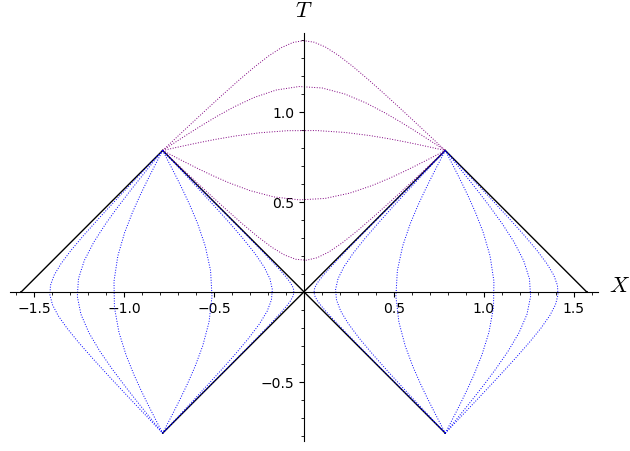

In [16]:
graphCauchy = X_CauchyIEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, v: 50},
                         ranges={r:(.5+eps,100)},color={r: 'black'},
                         number_values={r: 5})

graphCauchy += X_CauchyIEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, v:-50},
                         ranges={r:(.5+eps,100)},color={r: 'black'},
                         number_values={r: 5})

graphCauchy += X_CauchyOEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, u: -50},
                         ranges={r:(.5+eps,100)},color={r: 'black'},
                         number_values={r: 5})

graphCauchy += X_CauchyOEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, u:50},
                         ranges={r:(.5+eps,100)},color={r: 'black'},
                         number_values={r: 5})

for r0 in [.51,.85,.95,.99,.999]:
    graphCauchy += X_CauchyIEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={v: (-50, 50)},color={v: 'purple'}, thickness=.7, style='dotted',
                         number_values={v: 5})
    
for r0 in [1.0001, 1.001, 1.01, 1.1, 1.3, 2]:
    graphCauchy += X_CauchyIEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={v: (-50, 50)},color={v: 'blue'}, thickness=.7, style='dotted',
                         number_values={v: 5})
    graphCauchy += X_CauchyOEF.plot(X_2,ambient_coords=(X,T), mapping=Cauchy_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={u: (-50, 50)},color={u: 'blue'}, thickness=.7, style='dotted',
                         number_values={u: 5})

graphCauchy

Le graphe intermédiaire `graphBH_int` est introduit uniquement pour des raisons graphiques.



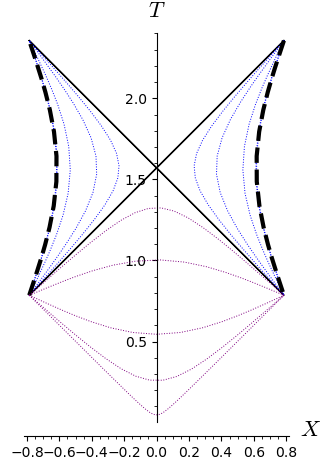

In [17]:
graphBH_int = X_BHIEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, v: 50},
                         ranges={r:(0,1-eps)},color={r: 'black'},
                         number_values={r: 5})

graphBH_int += X_BHIEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, v:-50},
                         ranges={r:(0,1-eps)},color={r: 'black'},
                         number_values={r: 5})

graphBH_int += X_BHOEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, u: -50},
                         ranges={r:(0,1-eps)},color={r: 'black'},
                         number_values={r: 5})

graphBH_int += X_BHOEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, u:50},
                         ranges={r:(0,1-eps)},color={r: 'black'},
                         number_values={r: 5})


for r0 in [.1,.2, .4, .47, .49]:
    graphBH_int += X_BHIEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={v: (-50, 50)},color={v: 'blue'}, thickness=.7, style='dotted',
                         number_values={v: 5}, plot_points=300)
    graphBH_int += X_BHOEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={u: (-50, 50)},color={u: 'blue'},thickness=.7, style='dotted',
                         number_values={u: 5}, plot_points=300)

    
graphBH_int += X_BHIEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:0},
                         ranges={v: (-50, 50)},color={v: 'black'},
                         number_values={v: 5}, plot_points=300, style='--', thickness=3)

graphBH_int += X_BHOEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:0},
                         ranges={u: (-50, 50)},color={u: 'black'},
                         number_values={u: 5}, plot_points=300, style='--', thickness=3)

graphBH = graphBH_int

for r0 in [.51,.55,.65,.75,.89]:
    graphBH += X_BHIEF.plot(X_2,ambient_coords=(X,T), mapping=BH_to_E2_X, fixed_coords={th: pi/2,  ph: pi, r:r0},
                         ranges={v: (-50, 50)},color={v: 'purple'}, thickness=.7, style='dotted',
                         number_values={v: 5}, plot_points=300)

graphBH

Les lignes en pointillés correspondent aux hypersurfaces $r=\mathrm{const}$. On voit que ces hypersurfaces sont de genre espace dans la région $\mathrm{II}a$. 


On peut combiner ces deux graphes pour obtenir le diagramme conforme d'une extension de la solution de Reissner\-Nordström. L'extension maximale peut\-être construite avec des motifs similaires répétés périodiquement.



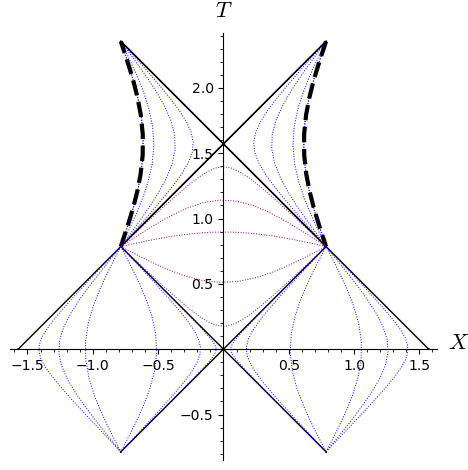

In [18]:
graph = graphBH_int + graphCauchy
graph.show()

## Géodésiques dans l'extension maximale



On s'intéresse aux géodésiques radiales projetées dans le diagramme conforme de l'espace\-temps de Reissner\-Nordström. On se donne donc une vitesse initiale :


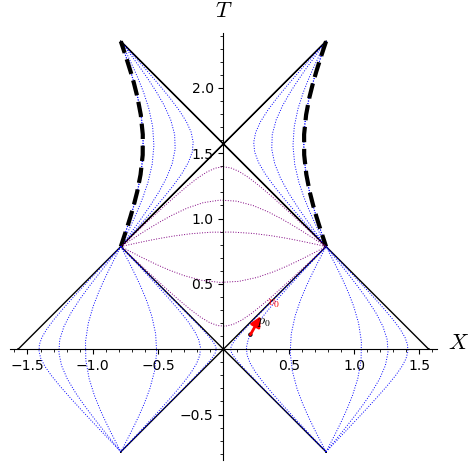

In [19]:
p0=M((-10,1.001,pi/2,pi), name='p_0')
v0=M.tangent_space(p0)((3,0.0001,0,0), name='v_0')

#Affichage de la donnée initiale :
graph0 = graph

if p0.coordinates()[1]>rm:
    graph0 += p0.plot(chart=X_2, mapping=Cauchy_to_E2_X, size=10)
    graph0 += v0.plot(chart=X_2, mapping=Cauchy_to_E2_X, scale=1, arrowsize=3, color='red')
else:
    graph0 += p0.plot(chart=X_2, mapping=BH_to_E2_X, size=10)
    graph0 += v0.plot(chart=X_2, mapping=BH_to_E2_X, scale=5, arrowsize=3, color='red')

graph0

On peut ensuite intégrer la géodésique associée à cette vitesse initiale. Si l'intégration est opérée au niveau de la variété $\mathscr{M}$ en entier, l'affichage sépare les régions $\mathcal{R}_\mathrm{Cauchy}$ et $\mathcal{R}_\mathrm{BH}$. 


In [20]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 30), v0)
sol = geod.solve(step = .001) 
interp = geod.interpolate()

In [21]:
solCauchy=[]
solBH=[]

for i in sol :
    if i[2]>rm:
        solCauchy.append(i)
    if i[2]<rp:
        solBH.append(i)

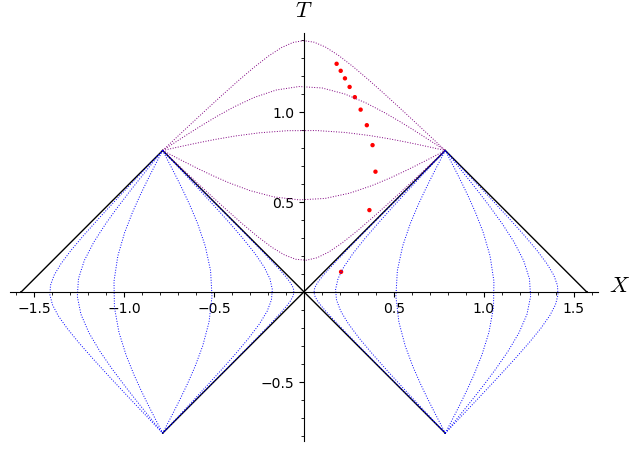

In [22]:
graphCauchy2 = graphCauchy
N=len(solCauchy)
for i in range(0,N,N//10):
    p = M((solCauchy[i][1],solCauchy[i][2],pi/2,pi), name='p')
    graphCauchy2 += p.plot(chart=X_2, mapping=Cauchy_to_E2_X, color='red', label=' ')

graphCauchy2

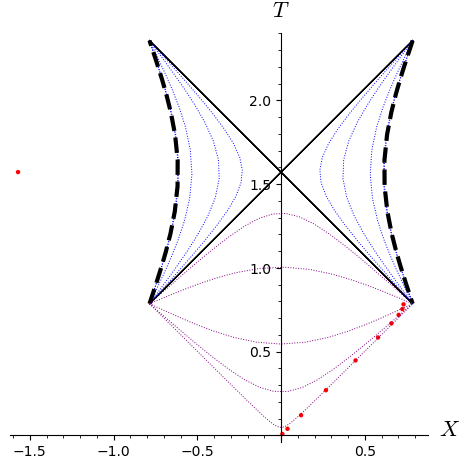

In [23]:
graphBH2 = graphBH
N=len(solBH)
for i in range(0,N,N//10):
    p = M((solBH[i][1],solBH[i][2],pi/2,pi), name='p')
    graphBH2 += p.plot(chart=X_2, mapping=BH_to_E2_X, color='red', label=' ')
graphBH2

On peut voir que la géodésique reste dans $\mathcal{R}_\mathrm{IEF}$. Ce comportement est en fait général : aucune géodésique de genre temps lancée depuis $\mathrm{I}a$ ne peut passer l'horizon de Cauchy de $\mathrm{II}a$ vers $\mathrm{III}c$.
